In [1]:
import numpy as np
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    df = dict(npz_file.items())
X = df['overfeat']
y = df['labels']
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size=4000,test_size=1000,random_state=0,stratify = y)

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline([
    ('pca', None), 
    ('logreg', SGDClassifier(loss='log',max_iter=1000, tol=1e-3, random_state=0))
])

In [9]:
grid_cv = GridSearchCV(pipe, [{
    'logreg__alpha': [0.0001, 0.001, 0.01],
}, {
    'pca': [PCA(n_components=163)],
    'logreg__alpha': [0.0001, 0.001, 0.01],
}], cv=5)

In [10]:
grid_cv.fit(X_tr,y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', None), ('logreg', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=0.001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'logreg__alpha': [0.0001, 0.001, 0.01]}, {'pca': [PCA(copy=True, iterated_power='auto', n_components=163, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)], 'logreg__alpha': [0.0001, 0.001, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
import pandas as pd
log_results = pd.DataFrame.from_items([
    ('n components', grid_cv.cv_results_['param_pca']),
    ('Alpha', grid_cv.cv_results_['param_logreg__alpha']),
    ('mean accuracy', grid_cv.cv_results_['mean_test_score']),
    ('standard deviation', grid_cv.cv_results_['std_test_score'])
])
log_results.sort_values(by='mean accuracy', ascending=False)

,n components,Alpha,mean accuracy,standard deviation
4,"PCA(copy=True, iterated_power='auto', n_compon...",0.001,0.82675,0.016557
5,"PCA(copy=True, iterated_power='auto', n_compon...",0.01,0.82675,0.015564
3,"PCA(copy=True, iterated_power='auto', n_compon...",0.0001,0.82275,0.012283
0,NaN,0.0001,0.81200,0.023111
2,NaN,0.01,0.80800,0.019358
1,NaN,0.001,0.79775,0.023431


Fit the model with tuned parameter to the test data set

In [21]:
pipe = Pipeline([
    ('pca', PCA(n_components=163)), 
    ('logreg', SGDClassifier(loss='log',alpha = 0.001, max_iter=1000, tol=1e-3, random_state=0))
])
pipe.fit(X_tr,y_tr)
log_test_score = pipe.score(X_te,y_te)
print(log_test_score)

0.821


In [22]:
a = log_results.sort_values(by='mean accuracy',ascending=False).iloc[0]
print('Top accuracy across folds:', a[2], 'with', a[0], 'components and alpha', a[2], 
      'Logistic Regression accuracy (test set):', log_test_score)

Top accuracy across folds: 0.82675 with PCA(copy=True, iterated_power='auto', n_components=163, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) components and alpha 0.82675 Logistic Regression accuracy (test set): 0.821


In [27]:
import random
index= []
for i in range(0,10):
    x = random.randint(0,1000)
    index.append(x)
    i = i+1

In [33]:
ten_images = X_te[index,:]

In [43]:
probability = pipe.predict_proba(ten_images)
probability = np.round(probability, decimals=4)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [44]:
prob = pd.DataFrame(probability, index = ['image 1', 'image 2', 'image 3', 'image 4', 'image 5', 'image 6',
                                         'image 7', 'image 8', 'image 9', 'image 10'], columns = ['truck','car',
                                                                                                 'airplane', 'ship'])
prob

,truck,car,airplane,ship
image 1,1.0,0.0,0.0,0.0
image 2,0.0,0.0,1.0,0.0
image 3,0.0,0.0,0.0,1.0
image 4,0.0,0.0,1.0,0.0
image 5,0.0,0.0,0.0,1.0
image 6,1.0,0.0,0.0,0.0
image 7,1.0,0.0,0.0,0.0
image 8,0.0,0.0,0.0,1.0
image 9,0.0,0.0,0.0,1.0
image 10,0.0,0.0,0.0,1.0


In [47]:
X_pixels = df['pixels']
X_pixels_tr,X_pixels_te,y_tr,y_te = train_test_split(X_pixels,y,train_size=4000,test_size=1000,random_state=0,stratify = y)
flat_images = X_pixels_te[index,:]

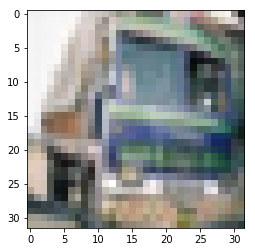

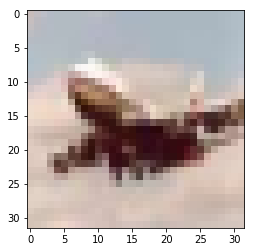

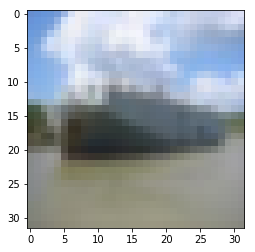

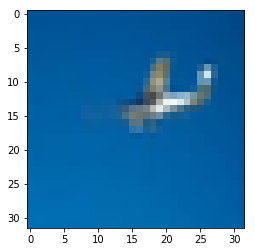

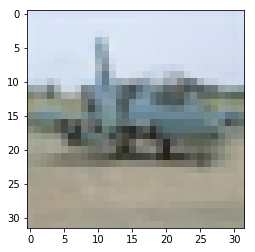

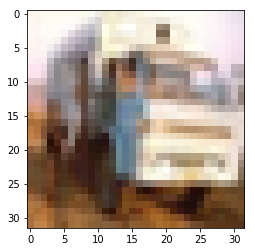

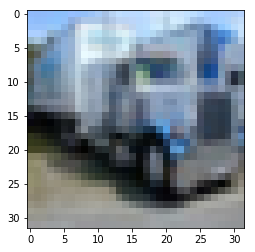

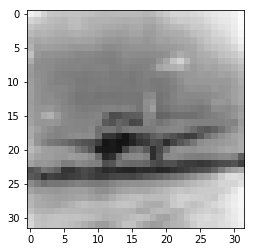

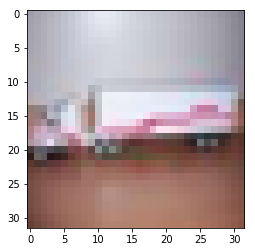

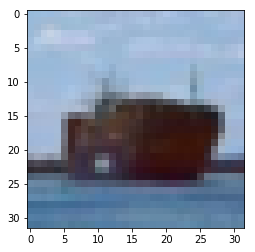

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt
for i in range(10):
    img = flat_images[i,:].reshape(32,32,3)
    plt.imshow(img)
    plt.show()